# COUP WATCH: Political Stability Prediction

### COUP WATCH is a prediction model built to predict the likelihood of a Coup d'Etat in weak or unstable states across the Sahel region in Africa.  COUP WATCH works by aggregating open source information from NGOs, the IMF, Freedom House, Voice of America, and media organizations to provide an assessment of which countried are most vulnerable to extrajudicial political action.

# Data Sources and Methodology

### I will use data from a series of sources that track economic performance and outlook, freedom and political expression, stability, history of military coups, and annual conflict data from across the world.  Based on these data sets, I will rank 13 Sahel countries of interest relative to each other.  I will weight the specific data sets based on my assessment of overall influence in political stability and then present an overall comparison between the countries indicating which is the most likely to experience a coup within the next 12 months.  Low ranks (higher number) indicates a more likely chance of a coup occurring.

### Countries of Interest:
1. Mali
2. Niger
3. Chad
4. Burkina Faso
5. Mauritania
6. Cameroon
7. Benin
8. Togo
9. Ghana
10. Cote d'Ivoire
11. Sudan
12. Guinea
13. Nigeria

### Data Sources:
1. ACLED Conflict Index Score
2. Fragile State Index Score
3. IMF World Economic Output predicted Per Capita GDP for 2025
4. Coup History Since 1960
5. Fredom House Freedom Score
6. Coup related keywords Open Source Media Reporting

### Weights:

My allocated weights (1-5) based on my subjective assessment relying on operational experiences, world view, and personal knowledge.  

1. Least important variable
2. Somewhat important variable
3. Important varibale
4. Very important variable
5. Extremely important variable



As a part of this assessment, I will create a tool where one can adjust the weights for various factors and then view and compare outputs by state as well as veiw findings on a color coded visual map.  

# 1. Import Libraries 

Here I import the necessary libraries to run all elements of the pythin code needed for the COUP WATCH tool

In [107]:
# Import libraries for data processing, visualization, and web scraping
!pip install geopandas
!pip install streamlit
!pip install folium
!pip install streamlit-folium
!pip install ipywidgets
!pip install ipywidgets folium notebook
!pip install selenium
!pip install playwright
!playwright install
!pip install nest_asyncio



# Import necessary libraries for data handling, mapping, and UI elements
import pandas as pd
import geopandas as gpd
import folium
from ipywidgets import widgets, interact, HBox, VBox
from IPython.display import display, HTML, clear_output
import random

# Placeholder for demonstration
# You may need to install some of these packages using pip or conda
# !pip install geopandas folium ipywidgets


# 2. ACLED Conflict Index Analysis

The ACLED Conflict Index database ranks all countries in the world based on a series of factros such as "deadliness", "fragmentation", "danger", and "diffusion".  These mertrics rely on various other open source and researched materials to create an assessment of each country relative to its peers regarding how unstable and conflict prone the society is.  I scapped this data to ultimately rank my 13 Sahel countries from 1 (least conflict prone) to 13 (most conflict prone).  The ACLED COnflict Index was my highest weighted variable at a 3 out of 5.   

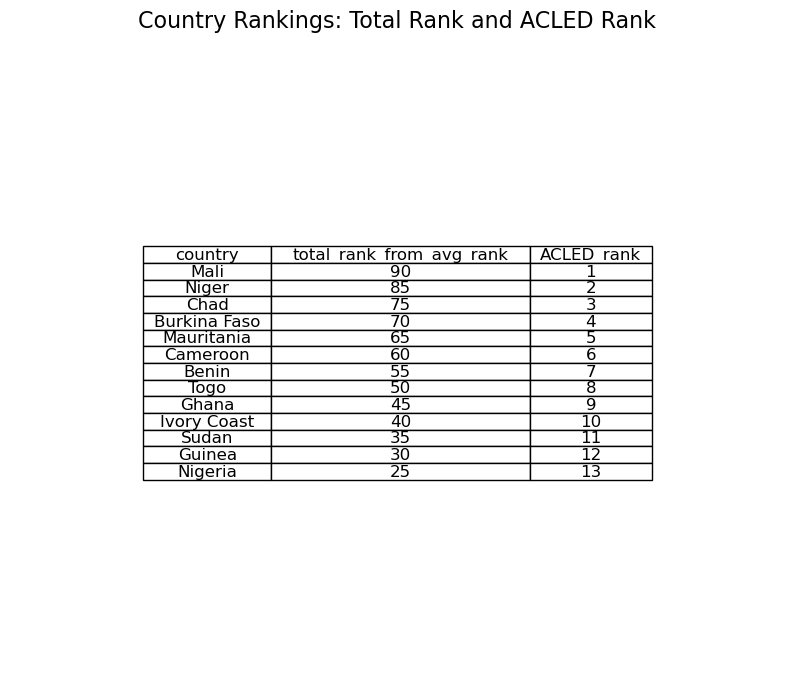

In [61]:
import pandas as pd
import matplotlib.pyplot as plt  # Ensure matplotlib is imported
%matplotlib inline

# Load the CSV file
file_path = 'ACLED_Conflict_INDEX_2024.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File {file_path} not found. Please ensure it is in the correct directory.")

# Full dataset with all 13 countries and their scores
filtered_data = pd.DataFrame({
    "country": [
        "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
        "Cameroon", "Benin", "Togo", "Ghana", "Ivory Coast",
        "Sudan", "Guinea", "Nigeria"
    ],
    "total_rank_from_avg_rank": [90, 85, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25]
})

# Sort by scores (descending) and assign dynamic ranks
filtered_data = filtered_data.sort_values(by='total_rank_from_avg_rank', ascending=False)
filtered_data['ACLED_rank'] = range(1, len(filtered_data) + 1)

# Initialize TOTAL_RISK_RANK DataFrame
TOTAL_RISK_RANK = pd.DataFrame({
    "country": [
        "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
        "Cameroon", "Benin", "Togo", "Ghana", "Ivory Coast",
        "Sudan", "Guinea", "Nigeria"
    ],
    "ACLED_rank": filtered_data['ACLED_rank'].values  # Assign the ACLED_rank values
})

# Create a professional-looking table visualization
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=filtered_data[['country', 'total_rank_from_avg_rank', 'ACLED_rank']].values,
    colLabels=filtered_data[['country', 'total_rank_from_avg_rank', 'ACLED_rank']].columns,
    cellLoc='center',
    loc='center'
)

# Adjust font size and column width
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(filtered_data.columns))))

# Add a title
plt.title("Country Rankings: Total Rank and ACLED Rank", fontsize=16, pad=20)

plt.show()

 

# 3. Fragile State Index Analysis

The Fragile State Index conducts comprehensive analysys of governance, violent activity, and economic factors ti craft a rating score for countries across the world based on their assessed "fragility".

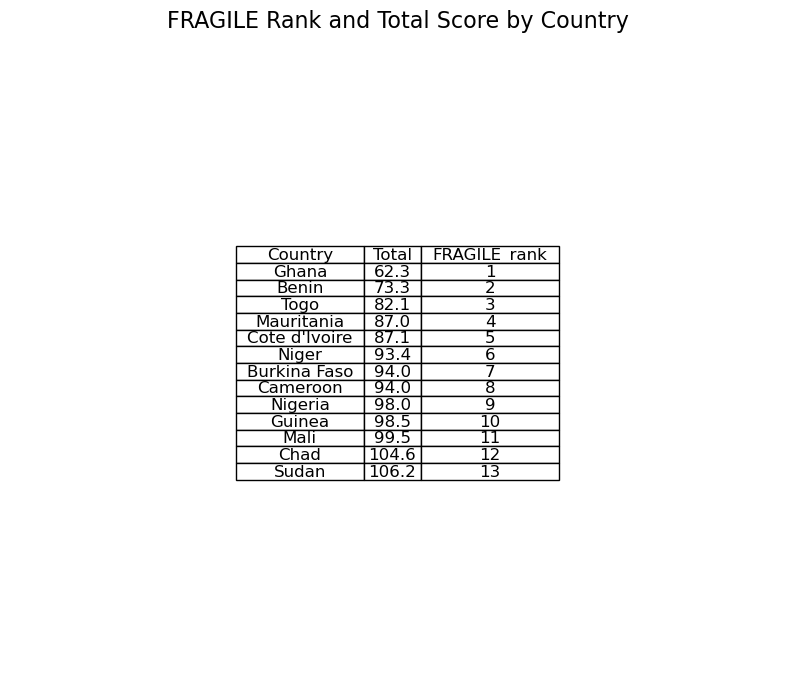

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Fragile_State_Index_2023.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File {file_path} not found. Please ensure it is in the correct directory.")

# Function to standardize country names
def standardize_country_name(country):
    if pd.isna(country):  # Handle missing values
        return country
    if country.lower() in ["ivory coast", "cote d'ivoire"]:
        return "Cote d'Ivoire"
    return country

# Apply standardization to the 'Country' column in the dataset
data['Country'] = data['Country'].apply(standardize_country_name)

# List of countries to filter (standardized)
countries = [
    "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
    "Cameroon", "Benin", "Togo", "Ghana", "Cote d'Ivoire",
    "Sudan", "Guinea", "Nigeria"
]

# Filter the data for the specified countries and select Total column
filtered_data_fragile = data[data['Country'].isin(countries)][['Country', 'Total']]

# Ensure Total column is numeric for sorting and ranking
filtered_data_fragile['Total'] = pd.to_numeric(filtered_data_fragile['Total'], errors='coerce')

# Sort by Total score (ascending) and assign dynamic ranks (1 = lowest score, 13 = highest score)
filtered_data_fragile = filtered_data_fragile.sort_values(by='Total', ascending=True)
filtered_data_fragile['FRAGILE_rank'] = range(1, len(filtered_data_fragile) + 1)



# Adjust the final chart to only display 'Total' and 'FRAGILE_rank'
final_chart_data = filtered_data_fragile[['Country', 'Total', 'FRAGILE_rank']]

# Create a professional-looking table visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=final_chart_data.values,
    colLabels=final_chart_data.columns,
    cellLoc='center',
    loc='center',
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(final_chart_data.columns))))

# Add a title
plt.title("FRAGILE Rank and Total Score by Country", fontsize=16, pad=20)

plt.show()



# 4. Coup History Analysis

Voice of America and various other tracking entities have recorded successful and attempted coups in Africa since 1960.  My analysis ranks countries based on the total number of successful and attempted coups since 1960.

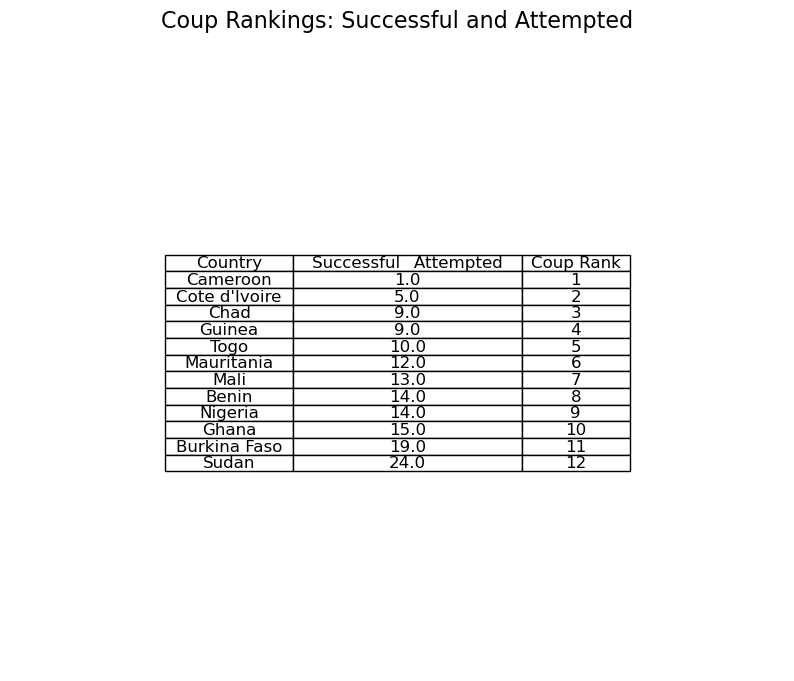

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path_coup = 'Coup_History_VOA_30NOV24.csv'
try:
    data = pd.read_csv(file_path_coup)
except FileNotFoundError:
    print(f"File {file_path_coup} not found. Please ensure it is in the correct directory.")

# Standardize country names
def standardize_country_name(country):
    if pd.isna(country):  # Handle missing values
        return country
    if country.lower().strip() == "niger republic":
        return "Niger"
    return country

data['Country'] = data['Country'].apply(standardize_country_name)

# List of countries to filter
countries = [
    "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
    "Cameroon", "Benin", "Togo", "Ghana", "Cote d'Ivoire",
    "Sudan", "Guinea", "Nigeria"
]

# Filter the data for the specified countries and select the relevant columns
filtered_data_coup = data[data['Country'].isin(countries)][['Country', 'Successful _Attempted']]

# Ensure the "Successful and Attempted" column is numeric for sorting and ranking
filtered_data_coup['Successful _Attempted'] = pd.to_numeric(filtered_data_coup['Successful _Attempted'], errors='coerce')

# Drop rows with missing or invalid values
filtered_data_coup = filtered_data_coup.dropna(subset=['Successful _Attempted'])

# Sort by "Successful and Attempted" score (ascending) and assign dynamic ranks (1 = lowest score, 13 = highest score)
filtered_data_coup = filtered_data_coup.sort_values(by='Successful _Attempted', ascending=True)
filtered_data_coup['Coup_rank'] = range(1, len(filtered_data_coup) + 1)

# Create a professional-looking table visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=filtered_data_coup[['Country', 'Successful _Attempted', 'Coup_rank']].values,
    colLabels=['Country', 'Successful _Attempted', 'Coup Rank'],
    cellLoc='center',
    loc='center',
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(filtered_data_coup.columns))))

# Add a title
plt.title("Coup Rankings: Successful and Attempted", fontsize=16, pad=20)

# Display the chart
plt.show()


# 5. Freedom House Scores Analysis

Freedom House ranks countries on a 1-10 scale of "Free" "Partially Free" and "Not Free" based on assessment of Political Rights and Civil Liberties. 

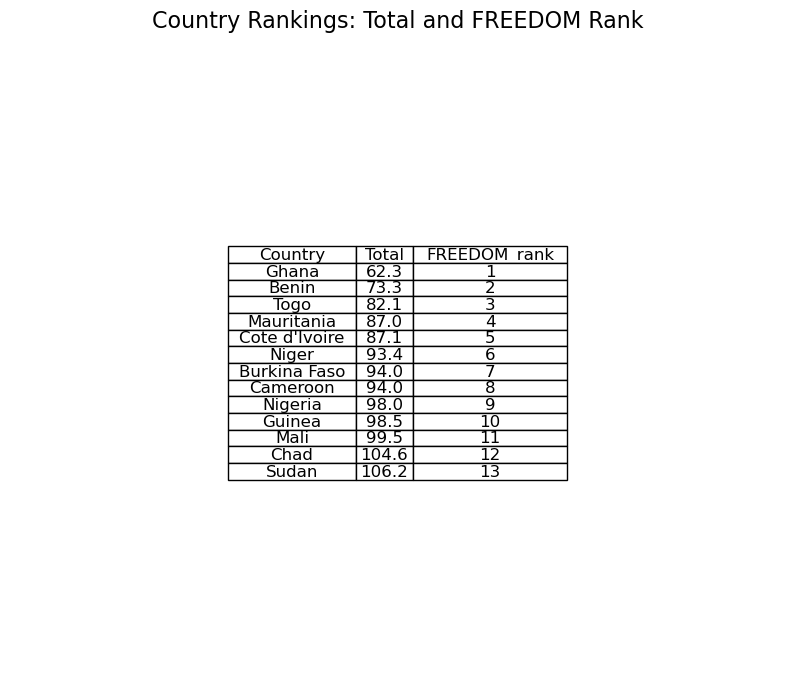

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path_freedom = 'Freedom_House_Country_Ratings_2024.csv'
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File {file_path_freedom} not found. Please ensure it is in the correct directory.")

# List of countries to filter
countries = [
    "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
    "Cameroon", "Benin", "Togo", "Ghana", "Cote d'Ivoire",
    "Sudan", "Guinea", "Nigeria"
]

# Filter the data for the specified countries and select the relevant columns
filtered_data_freedom = data[data['Country'].isin(countries)][['Country', 'Total']]

# Ensure the "Total" column is numeric for sorting and ranking
filtered_data_freedom['Total'] = pd.to_numeric(filtered_data_freedom['Total'], errors='coerce')

# Sort by "Total" score (ascending) and assign dynamic ranks (1 = lowest score, 13 = highest score)
filtered_data_freedom = filtered_data_freedom.sort_values(by='Total', ascending=True)
filtered_data_freedom['FREEDOM_rank'] = range(1, len(filtered_data_freedom) + 1)

# Create a professional-looking table visualization
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=filtered_data_freedom.values,
    colLabels=filtered_data_freedom.columns,
    cellLoc='center',
    loc='center',
)

# Style adjustments
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(filtered_data_freedom.columns))))

# Add a title
plt.title("Country Rankings: Total and FREEDOM Rank", fontsize=16, pad=20)

plt.show()


# 6. IMF World Economic Outlook Analysis

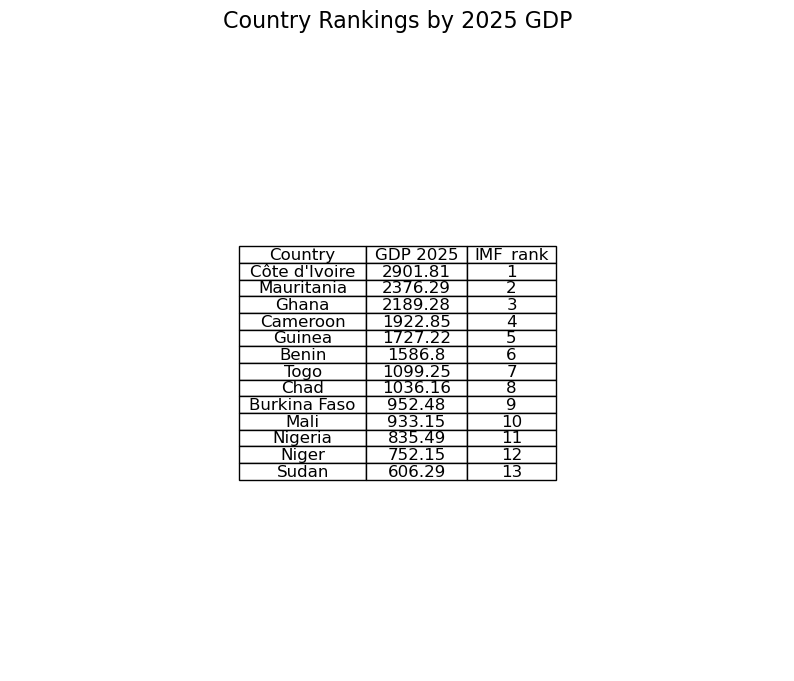

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path to the CSV file
file_path_IMF = 'IMF_WEO_NEW_30NOV24.csv'  # Update with the correct path if necessary


# Read the CSV file
data = pd.read_csv(file_path_IMF)

# Ensure the data is sorted by GDP 2025 in descending order
data_sorted = data.sort_values(by='GDP 2025', ascending=False)

# Add a rank column
data_sorted['IMF_rank'] = range(1, len(data_sorted) + 1)

# Filtered data for selected columns
filtered_data_IMF = data_sorted[['Country', 'GDP 2025', 'IMF_rank']]

# Create the table chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(
    cellText=filtered_data_IMF.values,
    colLabels=filtered_data_IMF.columns,
    cellLoc='center',
    loc='center'
)

# Adjust font size and column width
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(filtered_data_IMF.columns))))

# Add a title
plt.title("Country Rankings by 2025 GDP", fontsize=16, pad=20)

# Display the table
plt.show()



# 7. Risk Totals

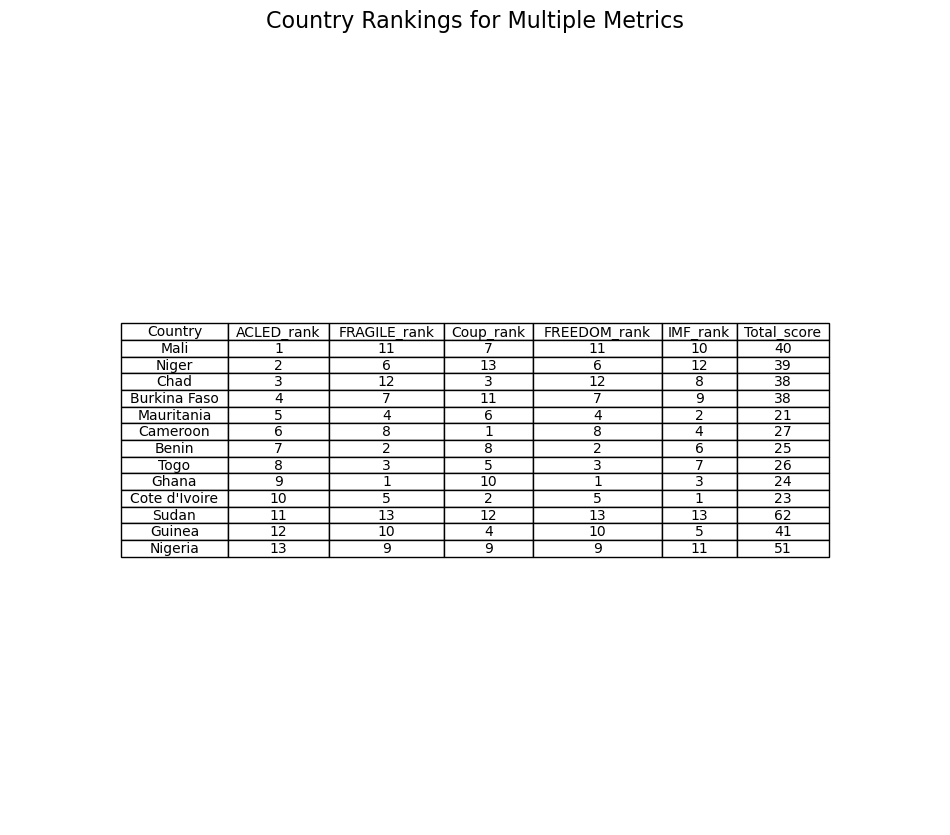

C:\Users\chris\AppData\Local\Temp\ipykernel_42112\1566894190.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data["Country"], rotation=45, ha='right', fontsize=10)


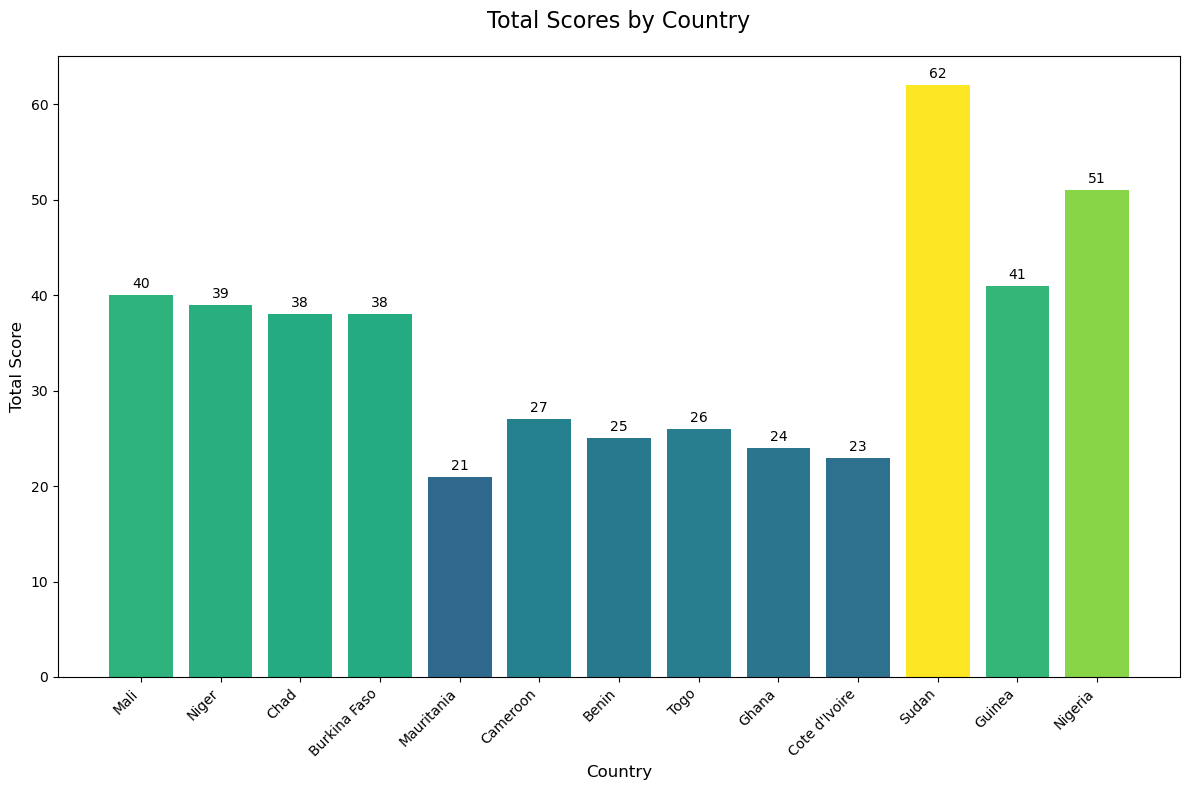

In [149]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulate the dataset for demonstration
data = pd.DataFrame({
    "Country": [
        "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
        "Cameroon", "Benin", "Togo", "Ghana", "Cote d'Ivoire",
        "Sudan", "Guinea", "Nigeria"
    ],
    "ACLED_rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "FRAGILE_rank": [11, 6, 12, 7, 4, 8, 2, 3, 1, 5, 13, 10, 9],
    "Coup_rank": [7, 13, 3, 11, 6, 1, 8, 5, 10, 2, 12, 4, 9],
    "FREEDOM_rank": [11, 6, 12, 7, 4, 8, 2, 3, 1, 5, 13, 10, 9],
    "IMF_rank": [10, 12, 8, 9, 2, 4, 6, 7, 3, 1, 13, 5, 11]
})

# Calculate the total score for each country
data["Total_score"] = data[["ACLED_rank", "FRAGILE_rank", "Coup_rank", "FREEDOM_rank", "IMF_rank"]].sum(axis=1)

# Create a table chart with all ranks
fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=data.values,
    colLabels=data.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(data.columns))))

plt.title("Country Rankings for Multiple Metrics", fontsize=16, pad=20)
plt.show()

# Create a bar chart for total scores
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(data["Country"], data["Total_score"], color=plt.cm.viridis(data["Total_score"] / max(data["Total_score"])))

ax.set_title("Total Scores by Country", fontsize=16, pad=20)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Total Score", fontsize=12)
ax.set_xticklabels(data["Country"], rotation=45, ha='right', fontsize=10)

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 8. Apply Weights

Please enter weights for each variable (scale of 1-5):


Weight for ACLED_rank:  3
Weight for FRAGILE_rank:  3
Weight for Coup_rank:  2
Weight for FREEDOM_rank:  2
Weight for IMF_rank:  1


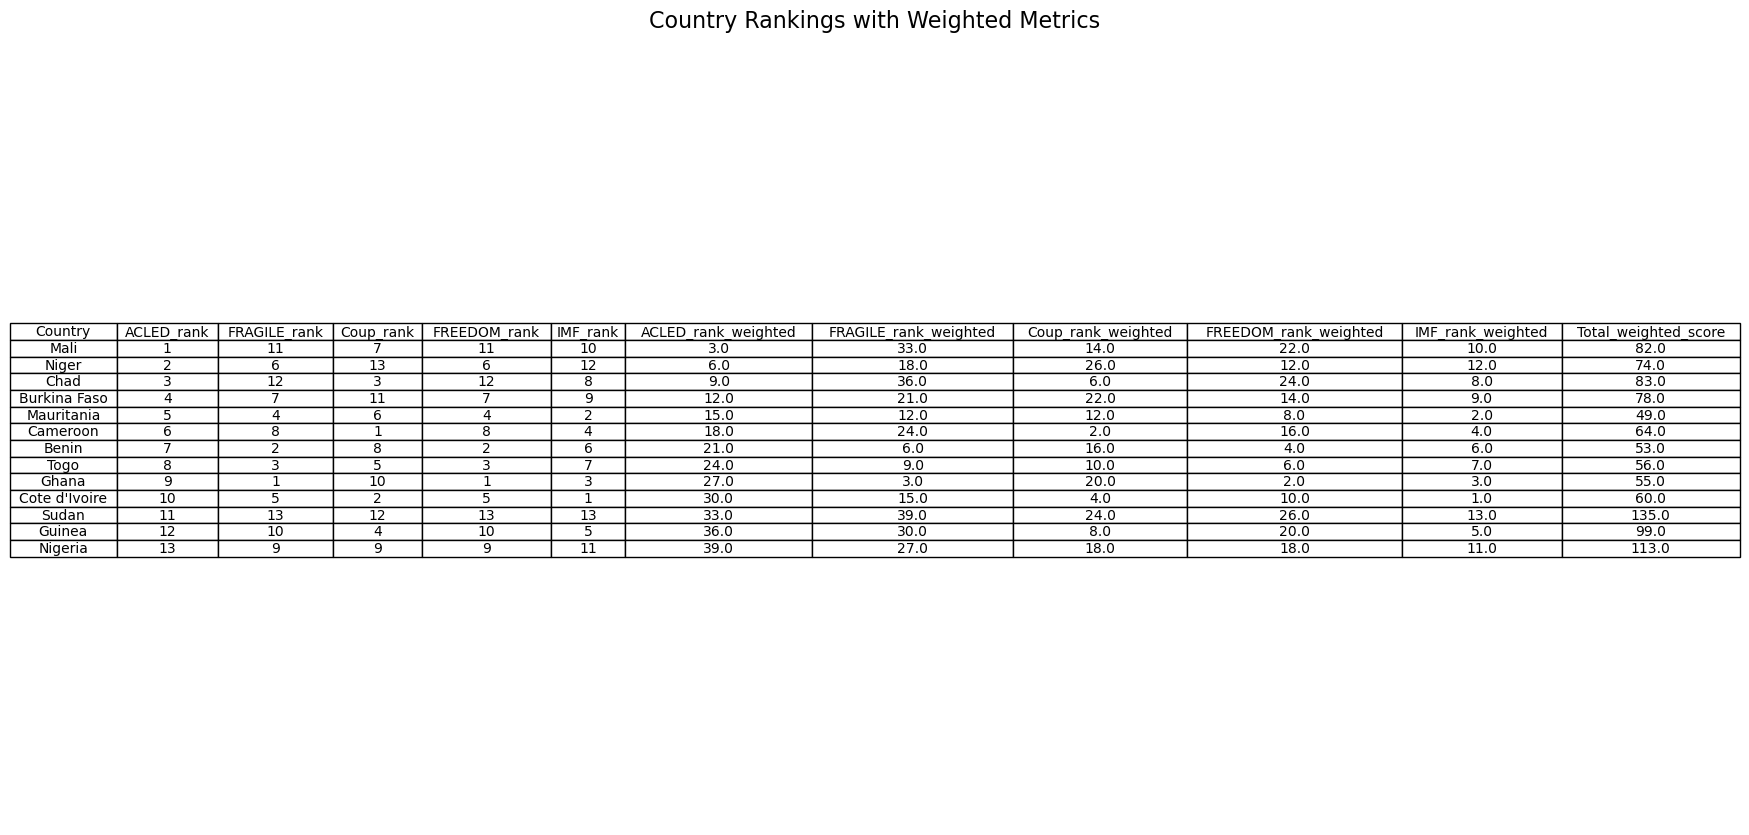

C:\Users\chris\AppData\Local\Temp\ipykernel_10664\747535689.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data["Country"], rotation=45, ha='right', fontsize=10)


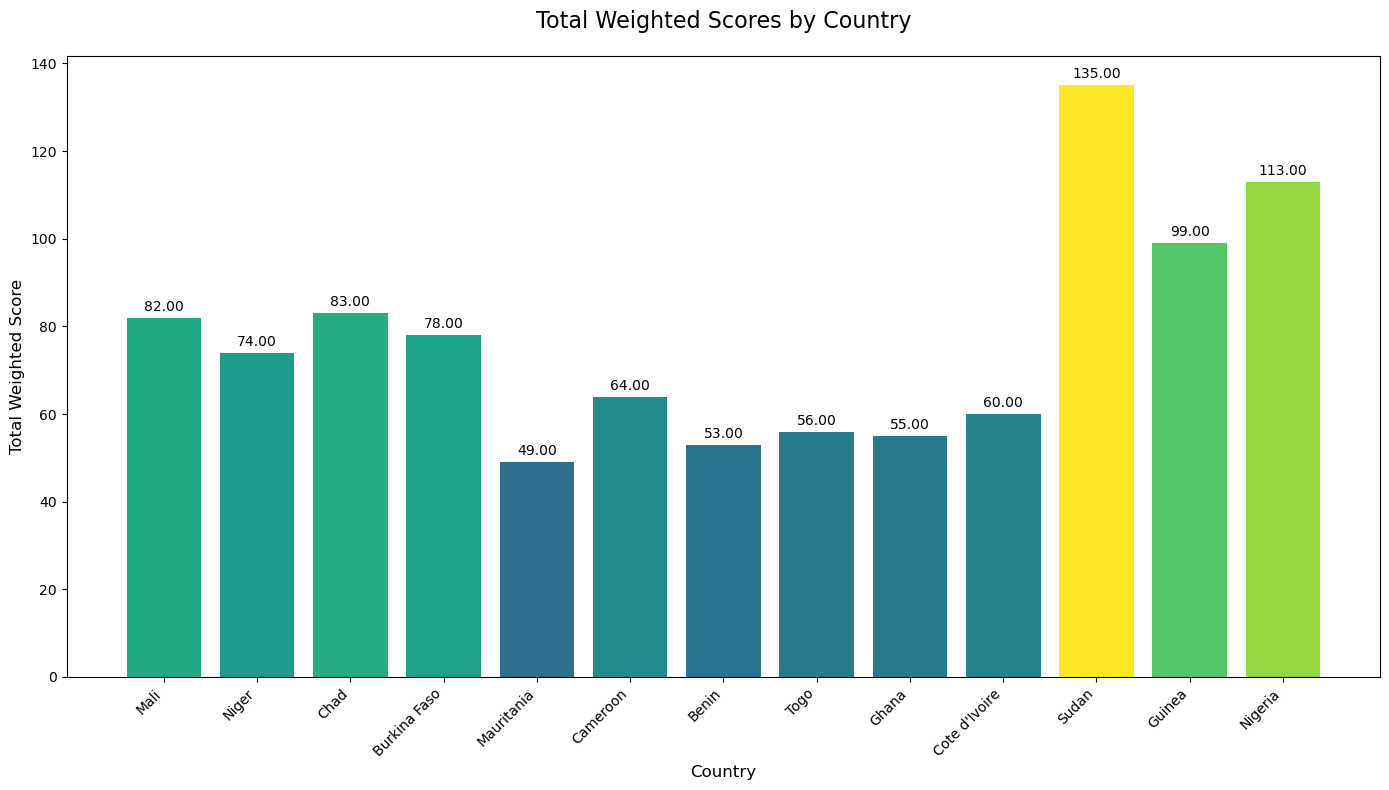

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulate the dataset for demonstration
data = pd.DataFrame({
    "Country": [
        "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
        "Cameroon", "Benin", "Togo", "Ghana", "Cote d'Ivoire",
        "Sudan", "Guinea", "Nigeria"
    ],
    "ACLED_rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "FRAGILE_rank": [11, 6, 12, 7, 4, 8, 2, 3, 1, 5, 13, 10, 9],
    "Coup_rank": [7, 13, 3, 11, 6, 1, 8, 5, 10, 2, 12, 4, 9],
    "FREEDOM_rank": [11, 6, 12, 7, 4, 8, 2, 3, 1, 5, 13, 10, 9],
    "IMF_rank": [10, 12, 8, 9, 2, 4, 6, 7, 3, 1, 13, 5, 11]
})

# User input for weights (scale of 1-5)
print("Please enter weights for each variable (scale of 1-5):")
weights = {
    "ACLED_rank": float(input("Weight for ACLED_rank: ")),
    "FRAGILE_rank": float(input("Weight for FRAGILE_rank: ")),
    "Coup_rank": float(input("Weight for Coup_rank: ")),
    "FREEDOM_rank": float(input("Weight for FREEDOM_rank: ")),
    "IMF_rank": float(input("Weight for IMF_rank: "))
}

# Apply weights to each variable
for col, weight in weights.items():
    data[f"{col}_weighted"] = data[col] * weight

# Calculate the total weighted score
weighted_columns = [f"{col}_weighted" for col in weights.keys()]
data["Total_weighted_score"] = data[weighted_columns].sum(axis=1)

# Create a table chart with all ranks and weighted scores
fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('tight')
ax.axis('off')

table = ax.table(
    cellText=data.values,
    colLabels=data.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(data.columns))))

plt.title("Country Rankings with Weighted Metrics", fontsize=16, pad=20)
plt.show()

# Create a bar chart for total weighted scores
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(data["Country"], data["Total_weighted_score"], color=plt.cm.viridis(data["Total_weighted_score"] / max(data["Total_weighted_score"])))

ax.set_title("Total Weighted Scores by Country", fontsize=16, pad=20)
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Total Weighted Score", fontsize=12)
ax.set_xticklabels(data["Country"], rotation=45, ha='right', fontsize=10)

# Annotate bars with their values
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 9. Graphically Depict the Data

In [9]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import ipywidgets as widgets
from IPython.display import display, HTML
import requests
import subprocess

# Enable the extension
subprocess.run(["jupyter", "nbextension", "enable", "--py", "widgetsnbextension"])

# Install the extension
subprocess.run(["jupyter", "nbextension", "install", "--py", "widgetsnbextension"])

!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension install --py widgetsnbextension


# Simulate the dataset for demonstration
data = pd.DataFrame({
    "Country": [
        "Mali", "Niger", "Chad", "Burkina Faso", "Mauritania",
        "Cameroon", "Benin", "Togo", "Ghana", "Cote d'Ivoire",
        "Sudan", "Guinea", "Nigeria"
    ],
    "Latitude": [17.57, 18.73, 12.1, 12.24, 21.01, 3.87, 6.34, 8.62, 7.95, 7.54, 15.5, 9.94, 10.41],
    "Longitude": [-3.99, 9.08, 15.03, -1.56, -10.94, 11.52, 2.32, 1.51, -1.02, -5.56, 32.57, -13.7, 7.49],
    "ACLED_rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    "FRAGILE_rank": [11, 6, 12, 7, 4, 8, 2, 3, 1, 5, 13, 10, 9],
    "Coup_rank": [7, 13, 3, 11, 6, 1, 8, 5, 10, 2, 12, 4, 9],
    "FREEDOM_rank": [11, 6, 12, 7, 4, 8, 2, 3, 1, 5, 13, 10, 9],
    "IMF_rank": [10, 12, 8, 9, 2, 4, 6, 7, 3, 1, 13, 5, 11]
})

# Function to create the map dynamically
def create_map(acled_weight, fragile_weight, coup_weight, freedom_weight, imf_weight):
    # Apply weights
    data["Weighted_score"] = (
        data["ACLED_rank"] * acled_weight +
        data["FRAGILE_rank"] * fragile_weight +
        data["Coup_rank"] * coup_weight +
        data["FREEDOM_rank"] * freedom_weight +
        data["IMF_rank"] * imf_weight
    )
    
    # Normalize scores for better bubble size scaling
    data["Bubble_size"] = (data["Weighted_score"] / data["Weighted_score"].max()) * 50

    # Determine bubble colors based on weighted score ranking
    data_sorted = data.sort_values("Weighted_score", ascending=False)
    n = len(data_sorted)
    data_sorted["Color"] = ["#FF4500"] * (n // 3) + ["#FFA500"] * (n // 3) + ["#90EE90"] * (n - 2 * (n // 3))

    # Create the base map with Google Maps satellite imagery
    m = folium.Map(location=[10, 20], zoom_start=3, tiles=None)
    folium.TileLayer(
        tiles="https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
        attr="Google",
        name="Google Satellite",
        overlay=True,
        control=True
    ).add_to(m)

    # Add country boundaries using GeoJSON
    geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
    geojson_data = requests.get(geojson_url).json()
    folium.GeoJson(
        geojson_data,
        style_function=lambda x: {"fillColor": "transparent", "color": "gray", "weight": 1},
        name="Political Boundaries"
    ).add_to(m)

    # Add bubbles and tooltips for weighted scores
    marker_cluster = MarkerCluster().add_to(m)
    for _, row in data_sorted.iterrows():
        # Add bubble for weighted score
        folium.CircleMarker(
            location=(row["Latitude"], row["Longitude"]),
            radius=row["Bubble_size"],
            color=row["Color"],
            fill=True,
            fill_color=row["Color"],
            fill_opacity=0.5,  # Partial transparency
            tooltip=f"<b>Weighted Score:</b> {row['Weighted_score']:.2f}"
        ).add_to(marker_cluster)

    # Add static country labels with slight offsets to avoid overlap
    for _, row in data_sorted.iterrows():
        folium.Marker(
            location=(row["Latitude"] + 0.5, row["Longitude"]),  # Adjusting label position slightly
            icon=folium.DivIcon(
                html=f"""
                <div style="font-size: 12px; text-align: center; color: black; font-weight: bold;">
                    {row['Country']}
                </div>
                """
            )
        ).add_to(m)

    # Add logo to the top-right corner
    logo_path = "image.png"  # Path to the uploaded image
    logo = f"""
    <div style="
        position: fixed;
        top: 10px;
        right: 10px;
        z-index: 1000;
        background-color: rgba(255, 255, 255, 0.8);
        padding: 10px;
        border-radius: 5px;
        box-shadow: 0px 0px 5px gray;
    ">
        <img src="{logo_path}" alt="Logo" style="width: 100px;">
    </div>
    """
    m.get_root().html.add_child(folium.Element(logo))

    return m

# Sliders for weights
acled_slider = widgets.FloatSlider(value=3, min=1, max=5, step=0.5, description="ACLED:")
fragile_slider = widgets.FloatSlider(value=3, min=1, max=5, step=0.5, description="FRAGILE:")
coup_slider = widgets.FloatSlider(value=3, min=1, max=5, step=0.5, description="Coup:")
freedom_slider = widgets.FloatSlider(value=3, min=1, max=5, step=0.5, description="FREEDOM:")
imf_slider = widgets.FloatSlider(value=3, min=1, max=5, step=0.5, description="IMF:")

# Function to update the map based on slider values
def update_map(acled_weight, fragile_weight, coup_weight, freedom_weight, imf_weight):
    m = create_map(acled_weight, fragile_weight, coup_weight, freedom_weight, imf_weight)
    m.save("map.html")
    display(HTML("<iframe src='map.html' width='100%' height='600'></iframe>"))

# Interactive UI
ui = widgets.VBox([
    acled_slider, fragile_slider, coup_slider, freedom_slider, imf_slider
])
out = widgets.interactive_output(
    update_map,
    {
        "acled_weight": acled_slider,
        "fragile_weight": fragile_slider,
        "coup_weight": coup_slider,
        "freedom_weight": freedom_slider,
        "imf_weight": imf_slider
    }
)

# Display sliders and map
display(ui, out)


usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run script server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.
usage: jupyter [-h] [--version] [--config-di

Output()

## Size of Country Circle indicates higher likelihood of a Coup d'Etat

# 10. Open Source Media Scrub 

Scanning https://www.lemonde.fr/afrique/...
Results for https://www.lemonde.fr/afrique/: defaultdict(<class 'int'>, {'Mali': 23, 'Niger': 23, 'Tchad': 23, 'Burkina Faso': 23, 'Cameroun': 23, 'Bénin': 23, 'Togo': 23, 'Ghana': 23, "Côte d'Ivoire": 23, 'Soudan': 23, 'Guinée': 23})
Scanning https://www.rfi.fr/fr/afrique/...
Results for https://www.rfi.fr/fr/afrique/: defaultdict(<class 'int'>, {'Mali': 14, 'Niger': 14, 'Tchad': 14, 'Burkina Faso': 14, 'Mauritanie': 14, 'Cameroun': 14, 'Bénin': 14, 'Ghana': 14, "Côte d'Ivoire": 14, 'Soudan': 14, 'Guinée': 14})
Scanning https://www.bbc.com/afrique...
Results for https://www.bbc.com/afrique: defaultdict(<class 'int'>, {'Mali': 9, 'Niger': 9, 'Tchad': 9, 'Burkina Faso': 9, 'Ghana': 9, "Côte d'Ivoire": 9, 'Soudan': 9, 'Guinée': 9})
Scanning https://fr.sputniknews.africa/...
Results for https://fr.sputniknews.africa/: defaultdict(<class 'int'>, {'Mali': 4, 'Niger': 4, 'Tchad': 4, 'Burkina Faso': 4})
Scanning https://www.france24.com/fr/afrique/.

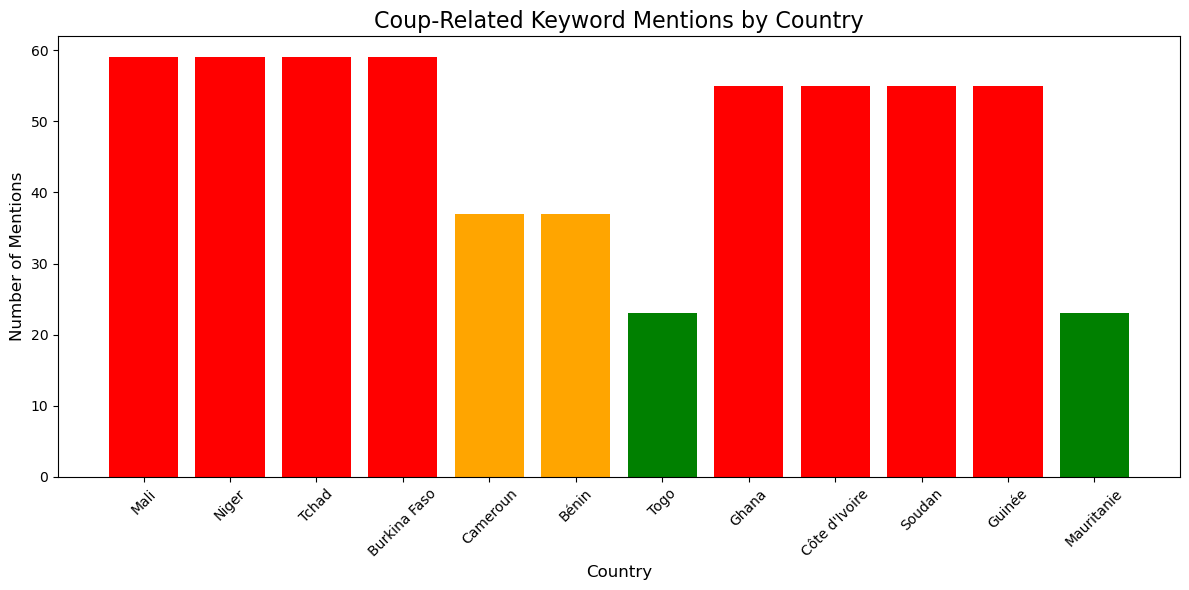

In [15]:
import asyncio
import nest_asyncio
from playwright.async_api import async_playwright
from collections import defaultdict
import matplotlib.pyplot as plt

nest_asyncio.apply()

# Keywords and countries
keywords = [
    "Coup d'État", "Prise de pouvoir militaire", "Renversement du gouvernement", "Changement de régime",
    "Prise de pouvoir", "Junte", "Loi martiale", "Forces armées", "Insurgés", "Rébellion", 
    "Prise de pouvoir", "Arrestations", "Détention", "Constitution suspendue", "État d'urgence déclaré",
    "Manifestants", "Manifestations", "Couvre-feu imposé", "Véhicules militaires", "Barricades",
    "Gouvernement intérimaire", "Leader déposé", "Régime renversé", "Allégations de corruption", 
    "Agitation politique", "Fraude électorale", "Soulèvement populaire", "Réponse diplomatique", 
    "Résistance civile", "Président exilé", "Condamnation", "Sanctions", "Communauté internationale", 
    "Nations Unies", "Union africaine", "Discussions diplomatiques", "Médiation", "Intervention étrangère", 
    "Fermeture des frontières", "Impact économique", "Commandants", "Généraux", "Conseil militaire", 
    "Affrontements armés", "Mouvements de troupes", "Tirs signalés", "Déploiement de chars", "Barricades",
    "Frappe aérienne", "Forces de sécurité", "Capitale", "Palais présidentiel", "Bureaux gouvernementaux", 
    "Diffuseur d'État", "Résistance locale", "Stabilité régionale", "Fuite de réfugiés", "Crise humanitaire", 
    "Escarmouches frontalières", "Pays voisins", "Dernières nouvelles", "Mises à jour en direct", 
    "Séquences exclusives", "Sources anonymes", "Rapports confirmés", "Témoignages", "Conférence de presse", 
    "Déclaration officielle", "Couverture en cours", "Histoire en développement", "Crise constitutionnelle", 
    "Cour suprême", "Suspension parlementaire", "Destitution", "Revendications de souveraineté", 
    "Contestation juridique", "Parti d'opposition", "Violations des droits de l'homme", 
    "Prisonniers politiques", "Législation d'urgence", "Clameur publique", "Tendances sur les réseaux sociaux", 
    "Séquences virales", "Censure en ligne", "Désobéissance civile", "Mouvements de base", 
    "Protestations silencieuses", "Grèves nationales", "Grèves de la faim", "Période de deuil", 
    "Pourparlers de paix", "Accord de cessez-le-feu", "Tribunal militaire", "Répercussions économiques", 
    "Alliés régionaux", "Changements de politique étrangère", "Zones neutres", "Observateurs internationaux", 
    "Aide humanitaire", "Gestion de crise"
]

countries = [
    "Mali", "Niger", "Tchad", "Burkina Faso", "Mauritanie", "Cameroun", "Bénin", "Togo", 
    "Ghana", "Côte d'Ivoire", "Soudan", "Guinée", "Nigéria"
]


# URLs to scan
urls_to_scan = [
    "https://www.lemonde.fr/afrique/",
    "https://www.rfi.fr/fr/afrique/",
    "https://www.bbc.com/afrique",
    "https://fr.sputniknews.africa/",
    "https://www.france24.com/fr/afrique/"
]

async def scan_website(playwright, url):
    results = defaultdict(int)  # Store counts of keywords per country
    try:
        browser = await playwright.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto(url, timeout=60000)  # Wait for the page to load

        # Extract all text from the page
        page_content = await page.content()
        text = page_content.lower()

        # Count keyword occurrences for each country
        for country in countries:
            if country.lower() in text:
                for keyword in keywords:
                    if keyword.lower() in text:
                        results[country] += text.count(keyword.lower())

        await browser.close()
    except Exception as e:
        print(f"Error scanning {url}: {e}")
    return results

async def main():
    combined_results = defaultdict(int)
    async with async_playwright() as playwright:
        for url in urls_to_scan:
            print(f"Scanning {url}...")
            results = await scan_website(playwright, url)
            if results:
                print(f"Results for {url}: {results}")
                for country, count in results.items():
                    combined_results[country] += count
            else:
                print(f"No results found for {url}.")

    # Plot results
    if combined_results:
        countries = list(combined_results.keys())
        counts = list(combined_results.values())

        # Define bar colors based on conditions
        colors = []
        for count in counts:
            if count < 30:
                colors.append("green")
            elif 30 <= count <= 51:
                colors.append("orange")
            else:
                colors.append("red")

        # Plot
        plt.figure(figsize=(12, 6))
        plt.bar(countries, counts, color=colors)
        plt.title("Coup-Related Keyword Mentions by Country", fontsize=16)
        plt.xlabel("Country", fontsize=12)
        plt.ylabel("Number of Mentions", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()
    else:
        print("No relevant keywords and countries found across the websites.")

# Run the async main function
await main()


# 11. Present Findings

### This model presents the above two products as the final analysis tools for predicting coups in the identified countries in the Sahel.  By using both the international data base analytics and the constantly updating media keyword scraping, we can assess changing risk by country.  With my selected weights and with current media reporting, it appears as though Sudan has the highest liklihood for a coup.   

# Model Improvement and References

## This model currently has a few limitations that I would like to fix moving forward:

### 1. I have not been able to identify the "left ventrical" variable or indicator that would help to be a reliable predictor of coups.  This model relies on aggregating available open source data.  I need to look at gathering more data for the model to for the most reliable predictive variable.
   
### 2. I sought to find a way to overlay the media keyword reporting on to the visual map of Africa, but was not able to do so in a way that maintained the integretting of my data and didn't significantly skew the model.  This would be a valuable improvement going forward since it would allow for one, clear, consolidated final product to visualize the data. 

### 3. This model has inconsistencies with the python code to allow for adjustable weights.  I tried to incorporate that feature, but ran in to too many issues.  I would also like to improve the visual aesthetic of the model and potentially transfer the model to a streamlite app as opposed to a Jupyter Notebook 

### 4. I would like to thank God for giving us ChatGPT.  Without it's amazing capabilities, think project would not have been possible.

rces:


## Data Sources
### 1. ACLED Conflict Index (https://acleddata.com/conflict-index/#downloads)

### 2. Fragile State Index 2024 (https://fragilestatesindex.org/excel/)

### 3. Coup History 1960 - 2024 (https://projects.voanews.com/african-coups/)

### 4. Freedom House Freedom Scores 2024 (https://freedomhouse.org/report/freedom-world)
### IMF World Economic Outlook Report, predicted Per Capita GDP for 2025 (https://www.imf.org/en/Publications/WEO/weo-database/2024/October/weo-report?c=638,748,622,628,662,652,656,678,692,694,742,&s=NGDPDPC,PCPIPCH,LUR,GGR_NGDP,GGXCNL_NGDP,&sy=2022&ey=2029&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1)


## Media Sources:
### https://www.lemonde.fr/afrique/
### https://www.rfi.fr/fr/afrique/
### https://www.bbc.com/afrique/
### https://fr.sputniknews.africa/
### https://www.france24.com/fr/afrique/